In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.feature_engineering.autoregressive_features import *
import glob
import os

/liubinxu/liubinxu/finance/learning/src/utils/data_utils.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [10]:
data11 = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/516950.qfq.kdj.parquet")
data12 = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/588000.qfq.kdj.parquet")

In [13]:
data11.columns[10:]

Index(['time_stamp', 'type', 'volume', 'suogu', 'preclose', 'adj',
       'amount_48_seasonal_rolling_20_mean',
       'amount_48_seasonal_rolling_20_std',
       'amount_48_seasonal_rolling_5_mean', 'amount_48_seasonal_rolling_5_std',
       'amount_48_seasonal_rolling_60_mean',
       'amount_48_seasonal_rolling_60_std', 'amount_normalize5',
       'amount_normalize20', 'amount_normalize60', 'close_rolling_6_mean',
       'close_rolling_6_std', 'close_rolling_6_std_mean',
       'close_rolling_24_mean', 'close_rolling_24_std',
       'close_rolling_24_std_mean', 'close_rolling_96_mean',
       'close_rolling_96_std', 'close_rolling_96_std_mean',
       'close_rolling_480_mean', 'close_rolling_480_std',
       'close_rolling_480_std_mean', 'close_rolling_2880_mean',
       'close_rolling_2880_std', 'close_rolling_2880_std_mean',
       'amount_normalize5_rolling_24_mean', 'amount_normalize5_rolling_24_std',
       'amount_normalize5_rolling_24_std_mean',
       'amount_normalize5_roll

In [88]:
data12

,open,close,high,low,vol,amount,datetime,code,date,date_stamp,...,close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll480,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll24,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll96,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5
index,,,,,,,,,,,,,,,,,,,,,
2021-03-11 09:40:00,1.270,1.268,1.273,1.266,26855600.0,34108892.0,2021-03-11 09:40:00,588000,2021-03-11,1.615392e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029180,0.004732,0.013407
2021-03-11 09:45:00,1.268,1.272,1.274,1.267,31012300.0,39436640.0,2021-03-11 09:45:00,588000,2021-03-11,1.615392e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022799,0.005503,0.007862
2021-03-11 09:50:00,1.272,1.281,1.281,1.271,25744200.0,32886352.0,2021-03-11 09:50:00,588000,2021-03-11,1.615392e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014832,-0.003903,0.002342
2021-03-11 09:55:00,1.281,1.282,1.283,1.281,18903800.0,24228528.0,2021-03-11 09:55:00,588000,2021-03-11,1.615392e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010920,-0.005460,0.000780
2021-03-11 10:00:00,1.282,1.280,1.283,1.279,14938000.0,19131120.0,2021-03-11 10:00:00,588000,2021-03-11,1.615392e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,-0.003906,0.003125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-17 14:40:00,1.051,1.051,1.053,1.051,39824200.0,41888728.0,2023-03-17 14:40:00,588000,2023-03-17,1.678982e+09,...,0.876055,0.980418,0.952571,0.978586,30.275834,53.823067,-16.818633,NaN,NaN,NaN
2023-03-17 14:45:00,1.051,1.052,1.053,1.051,59837200.0,62960544.0,2023-03-17 14:45:00,588000,2023-03-17,1.678982e+09,...,0.874339,0.980581,0.953802,0.978731,28.260165,49.562584,-14.344673,NaN,NaN,NaN
2023-03-17 14:50:00,1.052,1.054,1.054,1.052,65005200.0,68443088.0,2023-03-17 14:50:00,588000,2023-03-17,1.678982e+09,...,0.872561,0.980049,0.954648,0.978856,29.610743,46.237277,-3.642324,NaN,NaN,NaN


In [3]:
print(data11["amount_normalize60_rolling_480_mean"].mean(),
data11["amount_normalize60_rolling_480_mean"].max())

-0.2948909282616934 1.4308740583933317


Index(['open', 'close', 'high', 'low', 'vol', 'amount', 'datetime', 'code',
       'date', 'date_stamp',
       ...
       'close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll480',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll24',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll96',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480',
       'K', 'D', 'J', 'target_close1', 'target_close2', 'target_close5'],
      dtype='object', length=106)

In [4]:
feature_corrs_files = glob.glob("/liubinxu/liubinxu/finance/learning/data/*.qfq.kdj.parquet")

In [3]:
for feature_corrs_file in feature_corrs_files:
    data11 = pd.read_parquet(feature_corrs_file)
    print(os.path.basename(feature_corrs_file).split(".")[0],
    data11["amount_normalize60_rolling_480_mean"].mean(),
    data11["amount_normalize60_rolling_480_mean"].max(),
         data11["close_rolling_480_std_mean"].mean(),
    data11["close_rolling_480_std_mean"].max(), 
         )
    

NameError: name 'feature_corrs_files' is not defined

In [4]:
data11.columns

Index(['open', 'close', 'high', 'low', 'vol', 'amount', 'datetime', 'code',
       'date', 'date_stamp',
       ...
       'close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll480',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll24',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll96',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480',
       'K', 'D', 'J', 'target_close1', 'target_close2', 'target_close5'],
      dtype='object', length=106)

In [6]:
abs(data11["amount_normalize60_rolling_480_mean"]).corr(data11["target_close2"])

-0.018440471991115773

In [7]:
data = data12   
data["k_last"] = data["K"].shift(1)
data["k_last3"] = data["K"].shift(3)
data["K_choose"] = "none"
data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20) & (data["k_last3"] < 19)] = "type1"
data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50) & (data["k_last3"] < 45)]= "type2"

data_choose = data[(data["K_choose"] !="none")]
data_choose["K_choose_last"] = data_choose["K_choose"].shift()
data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"

# data_choose_K2 = data[(data["K_choose"] == "type1")]
# data_choose_K32 = data_choose[(data_choose["K_choose"] == "type3")]
data_choose_Kall2 = data_choose[(data_choose["K_choose"] == "type1") |  (data_choose["K_choose"] == "type3")]
data_choose_Kall2["target_close2"].mean()
data_choose_Kall2[data_choose_Kall2["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"] <- 0.75]["target_close2"].mean()

-0.0037889703467882782

In [8]:
data = data11   
data["k_last"] = data["K"].shift(1)
data["k_last3"] = data["K"].shift(3)
data["K_choose"] = "none"
data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20) & (data["k_last3"] < 19)] = "type1"
data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50) & (data["k_last3"] < 45)]= "type2"

data_choose = data[(data["K_choose"] !="none")]
data_choose["K_choose_last"] = data_choose["K_choose"].shift()
data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"

data_choose_K = data[(data["K_choose"] == "type1")]
data_choose_K3 = data_choose[(data_choose["K_choose"] == "type3")]
data_choose_Kall = data_choose[(data_choose["K_choose"] == "type1") |  (data_choose["K_choose"] == "type3")]


In [7]:
data_choose_Kall["target_close2"].mean()

0.0006506232866494552

In [8]:
data_choose_Kall[data_choose_Kall["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"] <- 0.75]["target_close2"].mean()

0.0025953140756305006

In [9]:
data_choose_Kall[data_choose_Kall["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"] <- 0.75]["target_close2"].mean()

0.005094989110000145

In [293]:
len(data_choose_Kall[data_choose_Kall["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"] < -0.75])

102

In [10]:
data_choose_Kall[data_choose_Kall["close_rolling_24_mean"] > data_choose_Kall["close_rolling_96_mean"] ]["target_close2"].mean()

0.0027463415878758277

In [11]:
data_choose_Kall[(data_choose_Kall["close_rolling_24_mean"] > data_choose_Kall["close_rolling_96_mean"]) & \
                (data_choose_Kall["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"] > 0.75)
                 
                ]["target_close2"].mean()

0.007076141246556255

In [12]:
data_choose_Kall[(data_choose_Kall["close_rolling_24_mean"] < data_choose_Kall["close_rolling_96_mean"]) & \
                (data_choose_Kall["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"] <- 0.75) & \
                 (data_choose_Kall["close_rolling_480_std_mean"] > 0.02)
                ]["target_close2"].mean()

0.008614109611792044

In [493]:
len(data_choose_Kall[(data_choose_Kall["close_rolling_24_mean"] < data_choose_Kall["close_rolling_96_mean"]) & \
                (data_choose_Kall["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"] <- 0.75) & \
                 (data_choose_Kall["close_rolling_480_std_mean"] > 0.02)
                ])

13

In [454]:
data_choose_Kall2[(data_choose_Kall2["close_rolling_24_mean"] > data_choose_Kall2["close_rolling_96_mean"]) & \
                (data_choose_Kall2["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"]  0.75)]["target_close2"].mean()

-0.003999415947712951

In [531]:
data_choose_Kall2[(data_choose_Kall2["close_rolling_24_mean"]  < data_choose_Kall2["close_rolling_96_mean"]) & \
                (data_choose_Kall2["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"] > -0.75) & \
                  (data_choose_Kall2["close_rolling_480_std_mean"] > 0.025)
                 ]["target_close2"].mean()

0.008255863898290396

In [14]:
data_choose_Kall2[data_choose_Kall2["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"] <- 0.75]

,open,close,high,low,vol,amount,datetime,code,date,date_stamp,...,K,D,J,target_close1,target_close2,target_close5,k_last,k_last3,K_choose,K_choose_last
index,,,,,,,,,,,,,,,,,,,,,
2021-06-17 09:35:00,1.455,1.463,1.467,1.455,35736400.0,52262528.0,2021-06-17 09:35:00,588000,2021-06-17,1.623859e+09,...,26.479562,21.447621,36.543442,0.050581,0.051265,0.082707,16.481356,18.590296,type1,type1
2021-06-24 10:35:00,1.566,1.565,1.568,1.565,9562300.0,14978368.0,2021-06-24 10:35:00,588000,2021-06-24,1.624464e+09,...,20.874546,19.360016,23.903604,0.001917,0.039617,0.049201,19.906598,15.229603,type1,typen
2021-07-06 14:35:00,1.581,1.584,1.585,1.579,11110700.0,17570560.0,2021-07-06 14:35:00,588000,2021-07-06,1.625501e+09,...,24.403575,15.791370,41.627986,0.025884,0.054293,0.037247,18.316549,9.085507,type1,type1
2021-07-13 13:50:00,1.641,1.640,1.642,1.639,7634800.0,12529216.0,2021-07-13 13:50:00,588000,2021-07-13,1.626106e+09,...,20.822859,16.016065,30.436448,-0.000610,-0.019512,-0.040854,17.987431,10.629174,type1,type2
2021-07-15 09:40:00,1.612,1.623,1.626,1.612,23596200.0,38244864.0,2021-07-15 09:40:00,588000,2021-07-15,1.626278e+09,...,22.396338,27.727326,11.734361,-0.001232,-0.030807,-0.005545,16.589891,16.918015,type1,typen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 13:35:00,1.036,1.036,1.036,1.035,12122800.0,12550194.0,2023-02-24 13:35:00,588000,2023-02-24,1.677168e+09,...,51.653144,36.856649,81.246133,-0.006757,-0.011583,0.003861,47.698058,37.256633,type3,type2
2023-02-27 14:55:00,1.028,1.029,1.029,1.028,49303700.0,50697328.0,2023-02-27 14:55:00,588000,2023-02-27,1.677427e+09,...,24.745919,22.145115,29.947529,0.002915,0.008746,0.022352,19.695103,18.360949,type1,type1
2023-02-28 14:05:00,1.026,1.025,1.026,1.024,16635200.0,17048636.0,2023-02-28 14:05:00,588000,2023-02-28,1.677514e+09,...,20.221951,17.288834,26.088185,0.010732,0.008780,0.014634,19.266341,11.743531,type1,type2


In [15]:
data_choose_choose[["close_rolling_480_std_mean", "target_close2"]][data_choose_choose["close_rolling_480_std_mean"] > 0.03]

NameError: name 'data_choose_choose' is not defined

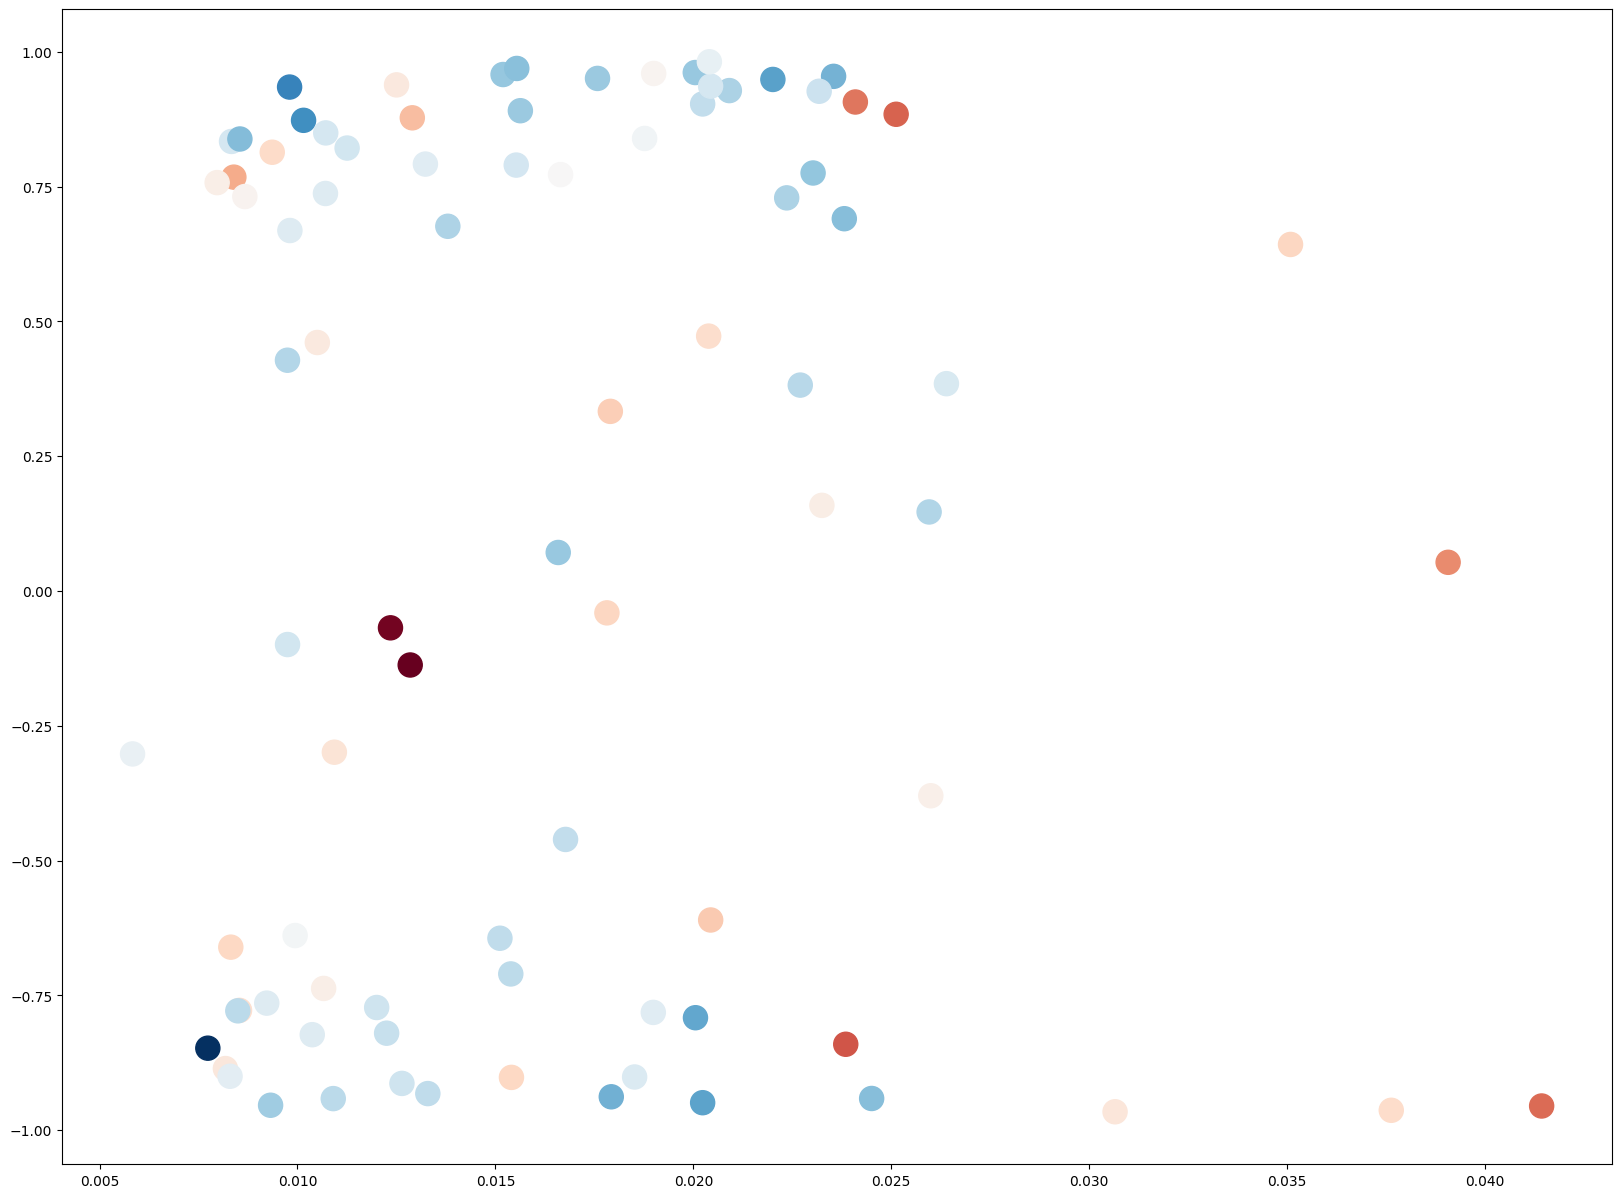

In [532]:
fig, ax1 = plt.subplots(1,1)
from matplotlib.colors import ListedColormap

data_choose_choose = data_choose_Kall[data_choose_Kall["close_rolling_24_mean"] > data_choose_Kall["close_rolling_96_mean"]]
# colors = np.stack((np.linspace(1, 0, len(color_d)), np.linspace(0, 1, len(color_d)), np.zeros(len(color_d))), axis=1)
cmap = ListedColormap(colors)
data_choose_choose["shape"] = "+"
data_choose_choose["shape"][data_choose_choose["target_close2"] >0] = "*"
# data_choose_choose = data_choose_choose[data_choose_choose["target_close2"] >0]
ax1.scatter(data_choose_choose["close_rolling_480_std_mean"], 
            data_choose_choose["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"] ,
            c=-data_choose_choose["target_close2"], 
#             marker = list(data_choose_choose["shape"]), 
            cmap=plt.cm.RdBu, s=300, alpha=1,  label='Original Data')


In [483]:
data_choose_choose.to_csv("1_down_choose.csv")

In [280]:
data_choose_Kall["datetime"]

index
2021-05-18 11:15:00    2021-05-18 11:15:00
2021-05-20 10:55:00    2021-05-20 10:55:00
2021-05-21 10:35:00    2021-05-21 10:35:00
2021-05-21 15:00:00    2021-05-21 15:00:00
2021-05-24 11:20:00    2021-05-24 11:20:00
                              ...         
2023-05-10 13:20:00    2023-05-10 13:20:00
2023-05-10 14:40:00    2023-05-10 14:40:00
2023-05-11 13:55:00    2023-05-11 13:55:00
2023-05-12 09:55:00    2023-05-12 09:55:00
2023-05-12 13:35:00    2023-05-12 13:35:00
Name: datetime, Length: 404, dtype: object

In [35]:
k2 = data11["amount_normalize_rolling_480_mean"].rolling(24).corr(data11['amount_diff_rolling_96_std']) 

In [36]:
k2.corr(data11["target_close2"])

0.03748083927120325

In [279]:
data_choose_Kall["datetime"]

index
2021-05-18 11:15:00    2021-05-18 11:15:00
2021-05-20 10:55:00    2021-05-20 10:55:00
2021-05-21 10:35:00    2021-05-21 10:35:00
2021-05-21 15:00:00    2021-05-21 15:00:00
2021-05-24 11:20:00    2021-05-24 11:20:00
                              ...         
2023-05-10 13:20:00    2023-05-10 13:20:00
2023-05-10 14:40:00    2023-05-10 14:40:00
2023-05-11 13:55:00    2023-05-11 13:55:00
2023-05-12 09:55:00    2023-05-12 09:55:00
2023-05-12 13:35:00    2023-05-12 13:35:00
Name: datetime, Length: 404, dtype: object

In [233]:
for c in data11.columns:
    print(c)

open
close
high
low
vol
amount
datetime
code
date
date_stamp
time_stamp
type
volume
suogu
preclose
adj
amount_48_seasonal_rolling_20_mean
amount_48_seasonal_rolling_20_std
amount_48_seasonal_rolling_5_mean
amount_48_seasonal_rolling_5_std
amount_48_seasonal_rolling_60_mean
amount_48_seasonal_rolling_60_std
amount_normalize5
amount_normalize20
amount_normalize60
close_rolling_6_mean
close_rolling_6_std
close_rolling_6_std_mean
close_rolling_24_mean
close_rolling_24_std
close_rolling_24_std_mean
close_rolling_96_mean
close_rolling_96_std
close_rolling_96_std_mean
close_rolling_480_mean
close_rolling_480_std
close_rolling_480_std_mean
close_rolling_2880_mean
close_rolling_2880_std
close_rolling_2880_std_mean
amount_normalize5_rolling_24_mean
amount_normalize5_rolling_24_std
amount_normalize5_rolling_24_std_mean
amount_normalize5_rolling_96_mean
amount_normalize5_rolling_96_std
amount_normalize5_rolling_96_std_mean
amount_normalize5_rolling_480_mean
amount_normalize5_rolling_480_std
amount

In [16]:
data11["range"] = data11["high"] - data11["low"]
data11["range"][data11["range"] == 0.0] = 0.001
data11["liquidity"] = data11["amount"] /data11["range"] *data11 ["close"]
data11, feature = add_seasonal_rolling_features(data11, seasonal_periods=[48], rolls=[60], column="liquidity" )
data11["liquidity_normal_60"] = data11["liquidity"]/data11["liquidity_48_seasonal_rolling_60_mean"]

/liubinxu/liubinxu/finance/learning/src/feature_engineering/autoregressive_features.py:309: UserWarning: Assuming just one unique time series in dataset. If there are multiple, provide `ts_id` argument
  warnings.warn(


KeyError: 'liquidity_normal_60'

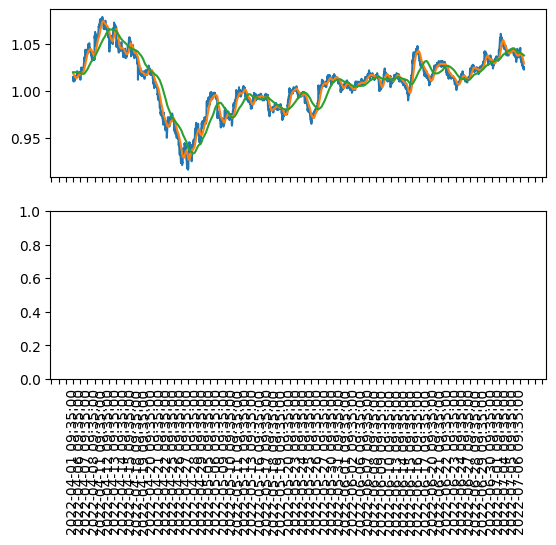

In [9]:


datac = data11[data11["datetime"]> "2022-04"][:3000]
import matplotlib.ticker as ticker
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(datac["datetime"], datac["close"], label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(24, min_periods=1).mean(), label=2)
ax1.plot(datac["datetime"], datac["close_rolling_24_mean"], label=2)
ax1.plot(datac["datetime"], datac["close_rolling_96_mean"], label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)


ax2.plot(datac["datetime"], datac["liquidity_normal_60"].rolling(24, min_periods=1).mean(), label=2)
ax2.plot(datac["datetime"], datac["liquidity_normal_60"].rolling(480, min_periods=1).mean(), label=2)

# fig, ax = plt.subplots(1,1)
# ax2.plot(datac["datetime"], datac["amount_normalize60_rolling_96_mean"], label=2)
# ax2.plot(datac["datetime"], datac["amount_normalize60_rolling_480_mean"], label=2)
# ax2.plot(datac["datetime"], datac["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"], label=2)
# ax2.plot(datac["datetime"], datac["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"], label=2)
# ax2.plot(datac["datetime"], datac["close_rolling_24_mean_amount_normalize60_rolling_24_mean_corr_roll480"], label=2)
#close_rolling_24_mean_amount_normalize60_rolling_24_mean_corr_roll24

# ax2.plot(datac["datetime"], datac["amount_diff_rolling_96_std"] - 0.72, label=2)
ax2.axhline(0.75, color="black")
ax2.axhline(-0.75, color="black")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
# plt.xticks(rotation=90)


# # fig, ax = plt.subplots(1,1)
# ax3.plot(datac["datetime"], datac["K"], label=2)
# ax3.plot(datac["datetime"], datac["D"], label=2)
# # # ax.plot(datac["datetime"], datac["J"], label=2)
# ax3.axhline(20, color="black")
# ax3.axhline(50, color="black")
# ax3.axhline(80, color="black")
# ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
# plt.xticks(rotation=90)
# plt.rcParams["figure.figsize"] = (20,15)

for x in data_choose_Kall["datetime"]:
    if x in datac["datetime"]:
        ax1.axvline(x, color="black")
        ax2.axvline(x, color="black")
#         ax3.axvline(x, color="black")

In [109]:
max(0.1, 0.2)

0.2

In [21]:
data12["range"] = data12["high"] - data12["low"]
data12["range"][data12["range"] == 0.0] = 0.001
data12["liquidity"] = data12["amount"] /data12["range"] * data12["close"]
data12, feature = add_seasonal_rolling_features(data12, seasonal_periods=[48], rolls=[60], column="liquidity" )
data12["liquidity_normal_60"] = data12["liquidity"]/data12["liquidity_48_seasonal_rolling_60_mean"]

/liubinxu/liubinxu/finance/learning/src/feature_engineering/autoregressive_features.py:309: UserWarning: Assuming just one unique time series in dataset. If there are multiple, provide `ts_id` argument
  warnings.warn(


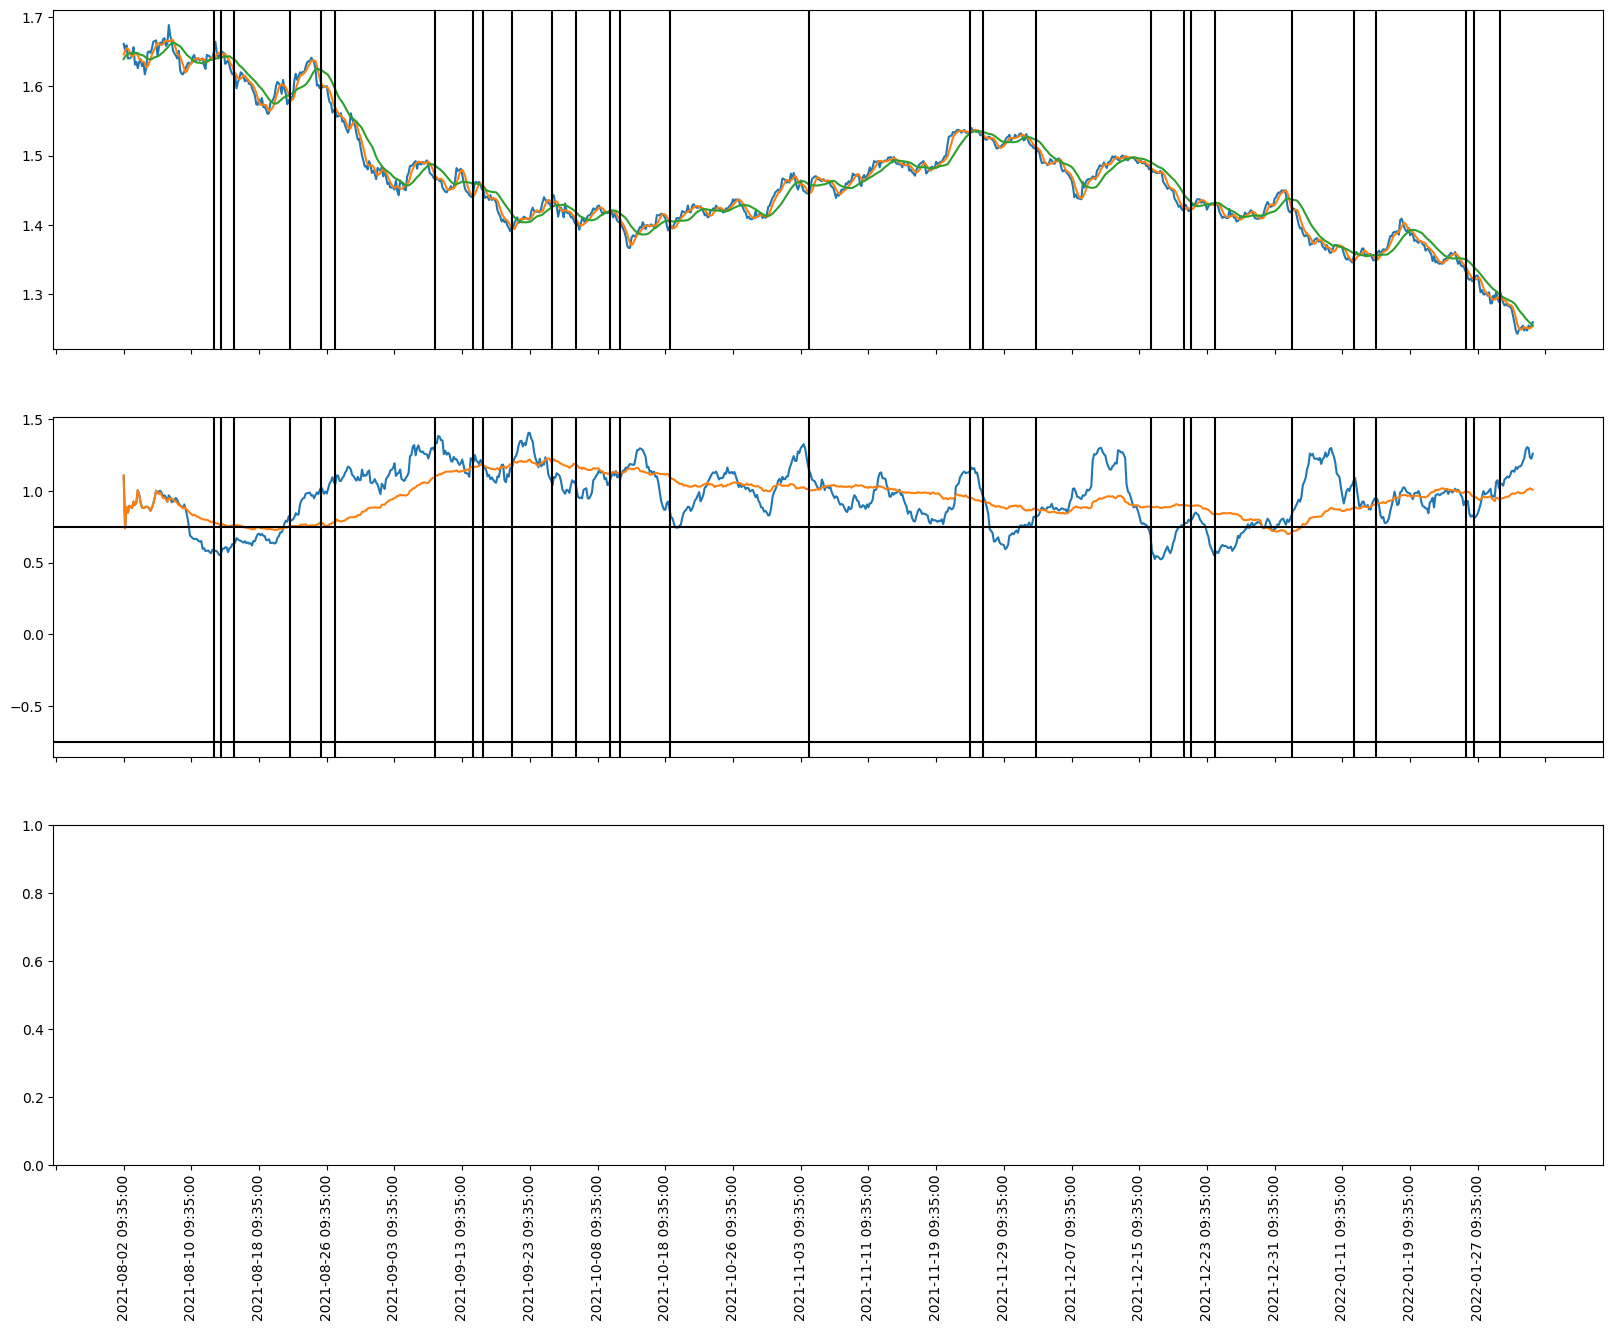

In [26]:
datac = data12[data12["datetime"]> "2021-08-01"][:6000:6]
import matplotlib.ticker as ticker
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)

ax1.plot(datac["datetime"], datac["close"], label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(24, min_periods=1).mean(), label=2)
ax1.plot(datac["datetime"], datac["close_rolling_24_mean"], label=2)
ax1.plot(datac["datetime"], datac["close_rolling_96_mean"], label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,20)


# fig, ax = plt.subplots(1,1)
ax2.plot(datac["datetime"], datac["liquidity_normal_60"].rolling(24, min_periods=1).mean(), label=2)
ax2.plot(datac["datetime"], datac["liquidity_normal_60"].rolling(120, min_periods=1).mean(), label=2)
# ax2.plot(datac["datetime"], datac["amount_normalize60_rolling_96_mean"], label=2)
# ax2.plot(datac["datetime"], datac["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll96"], label=2)
# ax2.plot(datac["datetime"], datac["close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll24"], label=2)
# ax2.plot(datac["datetime"], datac["amount_diff_rolling_480_std"] - 0.72, label=2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
# plt.xticks(rotation=90)

ax2.axhline(0.75, color="black")
ax2.axhline(-0.75, color="black")


# # fig, ax = plt.subplots(1,1)
# ax3.plot(datac["datetime"], datac["K"], label=2)
# ax3.plot(datac["datetime"], datac["D"], label=2)
# # # ax.plot(datac["datetime"], datac["J"], label=2)
# ax3.axhline(20, color="black")
# ax3.axhline(50, color="black")
# ax3.axhline(80, color="black")
# ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
# plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,15)
for x in data_choose_Kall2["datetime"]:
    if x in datac["datetime"]:
        ax1.axvline(x, color="black")
        ax2.axvline(x, color="black")
#         ax3.axvline(x, color="black")

In [39]:
from sklearn.linear_model import LinearRegression

In [73]:
choose_feature = ['amount_normalize_rolling_24_mean', 'amount_normalize_rolling_24_std',
       'amount_normalize_rolling_24_std_mean',

       'amount_normalize_rolling_96_mean', 'amount_normalize_rolling_96_std',
       'amount_normalize_rolling_96_std_mean',

       'amount_normalize_rolling_480_mean', 'amount_normalize_rolling_480_std',
       'amount_normalize_rolling_480_std_mean',
        'amount_diff_rolling_24_mean',
       'amount_diff_rolling_24_std', 'amount_diff_rolling_24_std_mean',

       'amount_diff_rolling_96_mean', 'amount_diff_rolling_96_std',
       'amount_diff_rolling_96_std_mean',

       'amount_diff_rolling_480_mean', 'amount_diff_rolling_480_std',
       'amount_diff_rolling_480_std_mean']

In [84]:
X = data11[1920:-960][choose_feature]
y = data11[1920:-960]["target_close2"]

# 假设X和y已经准备好了
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [86]:
choose2_feature =  list(pd.Series(choose_feature)[model.coef_ >0.001])

In [87]:
choose2_feature

['amount_normalize_rolling_480_mean',
 'amount_normalize_rolling_480_std',
 'amount_diff_rolling_24_mean',
 'amount_diff_rolling_96_mean']

In [90]:
model.coef_ 

array([ 2.21479318e-05, -1.61138532e-03, -4.78714996e-08, -5.45685582e-04,
       -1.61454702e-02, -1.98520403e-07,  1.32525931e-02,  2.78263111e-02,
       -1.48323496e-07,  1.47984467e-02, -3.87823896e-03, -2.31762330e-08,
        1.38487143e-02, -3.05648562e-03, -2.26178340e-09, -3.48643367e-01,
       -7.37219747e-05,  2.03442301e-10])

In [83]:
(0.015569 * data11["amount_normalize_rolling_480_mean"] + 0.00963* data11["amount_normalize_rolling_480_std"] + 0.008 * data11["amount_diff_rolling_24_mean"] -0.013 * data11["amount_diff_rolling_96_mean"]).corr(data11["target_close2"])

0.1151553482393379

In [48]:
X[480:]

,amount_normalize_rolling_24_mean,amount_normalize_rolling_24_std,amount_normalize_rolling_24_std_mean,amount_normalize_rolling_24_shapiro_stats,amount_normalize_rolling_24_kurtosis,amount_normalize_rolling_24_skewness,amount_normalize_rolling_96_mean,amount_normalize_rolling_96_std,amount_normalize_rolling_96_std_mean,amount_normalize_rolling_96_shapiro_stats,...,amount_diff_rolling_96_std_mean,amount_diff_rolling_96_shapiro_stats,amount_diff_rolling_96_kurtosis,amount_diff_rolling_96_skewness,amount_diff_rolling_480_mean,amount_diff_rolling_480_std,amount_diff_rolling_480_std_mean,amount_diff_rolling_480_shapiro_stats,amount_diff_rolling_480_kurtosis,amount_diff_rolling_480_skewness
index,,,,,,,,,,,,,,,,,,,,,
2021-04-19 09:40:00,-0.267569,0.749682,-2.742834,0.975678,0.034137,0.115327,-0.730524,0.738356,-1.005443,0.979338,...,-3426.706908,0.970561,0.758262,0.432092,0.001181,0.675817,571.732140,0.989846,0.721437,0.252366
2021-04-19 09:45:00,-0.267876,0.749861,-2.740345,0.975717,0.031753,0.116092,-0.730703,0.738344,-1.005180,0.979281,...,-4559.415859,0.970564,0.758343,0.431900,0.000268,0.675729,2515.918923,0.989724,0.724689,0.256341
2021-04-19 09:50:00,-0.273968,0.759626,-2.714303,0.975450,0.006601,0.076113,-0.735056,0.741682,-1.003746,0.979174,...,-188.147787,0.971590,0.719509,0.433373,-0.001873,0.676679,-360.913792,0.989887,0.711422,0.261054
2021-04-19 09:55:00,-0.240706,0.749557,-3.048434,0.973785,0.146515,-0.033116,-0.725820,0.744321,-1.020133,0.981547,...,90.049361,0.974145,0.559691,0.417793,0.001138,0.679812,596.707741,0.990052,0.679458,0.263540
2021-04-19 10:00:00,-0.212535,0.721560,-3.323538,0.960791,0.478085,-0.034692,-0.715686,0.739423,-1.027771,0.982188,...,82.001197,0.973990,0.566994,0.416970,-0.001052,0.679768,-645.308354,0.989807,0.683705,0.271332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 14:40:00,0.277884,0.255343,0.899538,0.980524,-0.131484,0.335301,-0.265223,0.750994,-2.816769,0.988860,...,63.373928,0.969341,1.533714,0.618482,0.000902,0.653029,723.113898,0.993636,0.604794,0.220467
2023-05-12 14:45:00,0.309406,0.243568,0.770638,0.979376,-0.255630,0.357844,-0.244847,0.747135,-3.035497,0.988835,...,36.821754,0.971228,1.512222,0.588428,0.002524,0.653057,258.444880,0.993771,0.602069,0.213867
2023-05-12 14:50:00,0.256432,0.417126,1.592401,0.743526,8.372513,-2.492643,-0.260626,0.755198,-2.882499,0.989684,...,-48.275228,0.972567,1.657875,0.442140,-0.002254,0.659085,-292.083344,0.994080,0.645414,0.173346
